Тимошенко Володимир ПР7.1


Імпортуємо бібліотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

Завантаження даних

In [3]:
url = "https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset"
df = pd.read_csv("C:/Users/mxnlm/Downloads/OneDrive_1_11.11.2023/shopping_trends.csv")

Перевірка розміру таблиці, пропусків і типів стовпців

In [4]:
print("Розмір таблиці:", df.shape)
print("Пропуски:\n", df.isnull().sum())
print("Типи стовпців:\n", df.dtypes)

Розмір таблиці: (3900, 19)
Пропуски:
 Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64
Типи стовпців:
 Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Rev

Вибір числових стовпців

In [5]:
selected_columns = ["Age", "Purchase Amount (USD)", "Review Rating", "Previous Purchases"]
numeric_df = df[selected_columns]

Перейменування стовпців

In [6]:
numeric_df.columns = [col.lower().replace(" ", "_") for col in numeric_df.columns]


Масштабування даних

In [7]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

Визначення кількості кластерів за допомогою методу ліктя

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

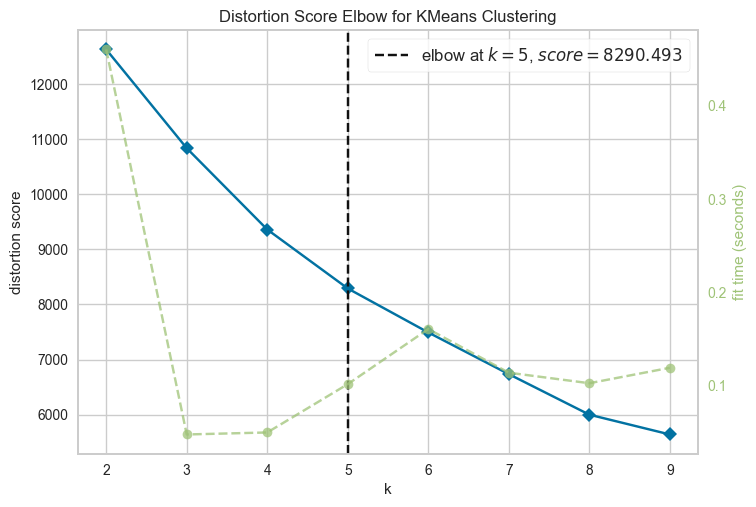

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(scaled_data)
visualizer.show()

Використання оптимальної кількості кластерів для K-means

In [9]:
optimal_k = visualizer.elbow_value_
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Візуалізація результатів (з використанням PCA для зменшення розмірності)


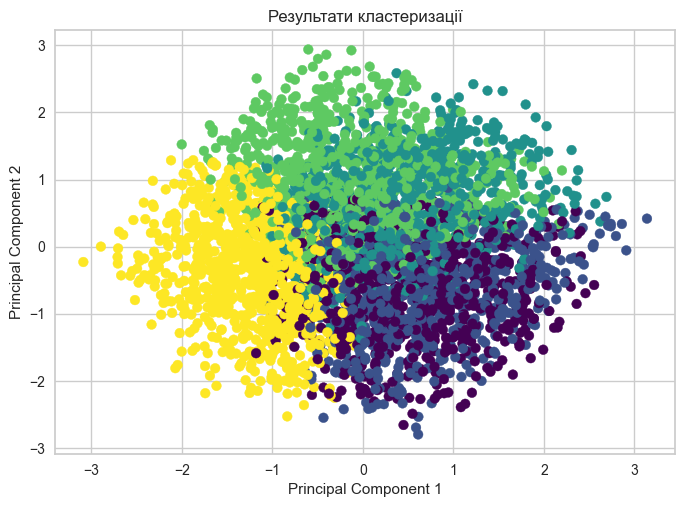

In [10]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['cluster'], cmap='viridis')
plt.title("Результати кластеризації")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

Висновок


В результаті застосування алгоритму K-means до набору даних про покупки клієнтів, вдалося виявити групи зі схожими характеристиками за вказаними числовими ознаками. Візуалізація розподілу об'єктів за кластерами допомагає зрозуміти та визначити спільні тенденції серед різних груп клієнтів.
